<a href="https://colab.research.google.com/github/VictorAFBZhao/Projeto_Tecnicas_de_Programacao_I/blob/main/Analise_e_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise de Dados de Acidentes Rodoviários

### Os dados analisados consistem em registros de acidentes rodoviários ocorridos em rodovias federais brasileiras entre 2010 e 2022.

* As fontes dos dados são os boletins estatísticos anuais de acidentes rodoviários publicados pela Polícia Rodoviária Federal.

Tratamento dos Dados

* Foi realizado um tratamento inicial dos dados, transformando as colunas numéricas de string para float para permitir análises posteriores.

* Foram identificados alguns dados faltantes,porém a análise mostrou que as tendências representam a realidade

Análises Realizadas

***Foram realizadas as seguintes análises exploratórias nos dados:***

    - Distribuição dos tipos de acidentes mais frequentes
    - Distribuição dos acidentes com e sem vítimas
    - Distribuição dos acidentes com vítimas feridas e fatais
    - Análise dos trechos rodoviários mais críticos
    - Evolução temporal da quantidade de acidentes

***Principais Insights***

    - O tipo de acidente mais comum é a colisão traseira, representando 22% do total
    - Cerca de 33% dos acidentes resultam em vítimas feridas ou mortas
    - As colisões frontais, apesar de menos frequentes, são as que mais vitimam, representando 15% dos acidentes fatais
    - A BR-101 em Santa Catarina é o trecho com maior quantidade de acidentes no período
    - A quantidade de acidentes teve uma tendência de aumento entre 2010 e 2016, estabilizando a partir de então
    
***Conclusão***

A análise exploratória inicial dos dados forneceu insights importantes sobre a natureza e evolução dos acidentes rodoviários no Brasil, destacando os tipos de acidentes e trechos mais críticos. Isso pode orientar a priorização de ações para melhoria da segurança viária.

# Código da análise

## 1.Importações e configurações iniciais

In [ ]:
# Realizando os imports necessários para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/projeto"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/projeto


## 2 Análises iniciais

In [ ]:
# Carregamento do arquivo com pandas
df = pd.read_csv('dados_tratados.csv', low_memory=False)
display(df)

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,lugar_acidente,tipo_de_acidente,automovel,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,ano
0,2010-01-01,04:21:00,18,acidente sem vitima,167,BR-393/RJ,Norte,Rodovia do Aço,Derrapagem,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010
1,2010-01-01,02:13:00,20,acidente sem vitima,"269,5",BR-116/PR,Sul,Autopista Regis Bittencourt,Colisão Traseira,2.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2010
2,2010-01-01,03:35:00,000024/2010,acidente sem vitima,77,BR-290/RS,Norte,Concepa,Colisão Lateral,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2010
3,2010-01-01,07:31:00,000038/2010,acidente sem vitima,52,BR-116/RS,Norte,Concepa,Queda de Moto,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010
4,2010-01-01,04:57:00,000027/2010,acidente sem vitima,33,BR-290/RS,Norte,Concepa,Queda de Moto,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863309,2022-12-31,00:08:00,4,acidente com danos materiais,"865,000",BR-262/MG,Oeste,Concebra,saida de pista,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022
863310,2022-12-31,03:28:00,21,acidente com vitima,"180,000",BR-50/MG,decrescente,ECO050,Capotamento,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2022
863311,2022-12-31,05:05:55,14,acidente sem vitima,"115,100",BR-116/PR,decrescente,Autopista Planalto Sul,Colisão Traseira,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2022
863312,2022-12-31,13:49:33,339,acidente com danos materiais,"379,000",BR-262/MG,Leste,Concebra,saida de pista,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022


In [ ]:
df.info() # ver número de linhas, colunas, tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863314 entries, 0 to 863313
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            863314 non-null  object 
 1   horario                         863314 non-null  object 
 2   n_da_ocorrencia                 863314 non-null  object 
 3   tipo_de_ocorrencia              863314 non-null  object 
 4   km                              863314 non-null  object 
 5   trecho                          863314 non-null  object 
 6   sentido                         863314 non-null  object 
 7   lugar_acidente                  863314 non-null  object 
 8   tipo_de_acidente                863314 non-null  object 
 9   automovel                       863314 non-null  float64
 10  bicicleta                       863314 non-null  float64
 11  caminhao                        863314 non-null  float64
 12  moto            

### Análise temporal dos rodovias de acidentes

In [ ]:
#definindo lista com os anos
anos = df['ano'].astype(str).unique().tolist()

#Transformando a data str em Obj datetime
valores_anos_media = []
# Armazenando em cada ano a quantidade de acidentes
for ano in anos:
  valores_anos_media.append(df['tipo_de_acidente'][df['ano'].astype(str) == ano].value_counts().sum())

#Plotagem para ver a progressão temporal
fig = px.line(x=anos[:-1], y=valores_anos_media[:-1], title='Quantidade de acidentes por ano') # Excluindo 2023 por ainda estar sendo percorrido
# Definir o range dos eixos x e y
fig.update_xaxes(title_text='Ano')  # Range dos anos, excluindo o último
fig.update_yaxes(title_text='Quantidade de Acidentes', range=[0, max(valores_anos_media)*1.1])  # Range dos valores


fig.show()



> O gráfico acima mostra a quantidade de acidentes nas rodovias por ano. Nota-se que manteve uma média com pouca variação se olhada num contexto maior, porém, comparando 2010 a 2022 houve um aumento de 2.046 unidades.


### 2.1 Análise da natureza dos acidentes

#### 2.1.1 Tipo de acidente com maior recorrência (Com ou sem vitimas)


In [ ]:
#Maiores ocorrencia de determinados tipos de acidentes
rank_tipo_acidente = df['tipo_de_acidente'].value_counts()
rank_tipo_acidente.head(7)

Colisão Traseira                             193992
saida de pista                                78537
Colisão Lateral                               68061
Capotamento                                   52793
Queda de Moto                                 46969
Engavetamento                                 46276
Choque - Defensa, barreira ou "submarino"     39806
Name: tipo_de_acidente, dtype: int64

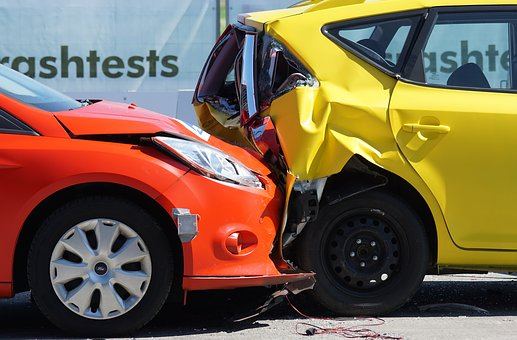

In [ ]:
# Representação em procentagem da colisão traseira
porcentagem_colisao_traseira = round((rank_tipo_acidente[0]/rank_tipo_acidente.sum() * 100), 2)
print(f'Colisão Traseira representa {porcentagem_colisao_traseira}% de todos os acidentes')

Colisão Traseira representa 22.47% de todos os acidentes


In [ ]:
#Análises estatísticas
media = df['tipo_de_acidente'].value_counts().mean()
mediana = df['tipo_de_acidente'].value_counts().median()
desvio_padrao = df['tipo_de_acidente'].value_counts().std()

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)


Média: 3786.464912280702
Mediana: 74.5
Desvio Padrão: 16003.786207129897


In [ ]:
#Plotagem dos principais tipos de acidentes
fig = px.bar(rank_tipo_acidente.head(7))

fig.update_xaxes(title_text='Tipo de acidente')  # Mudando label de x
fig.update_yaxes(title_text='Quantidade de Acidentes')  # Mudando label de y
fig.show()

> O gráfico apresenta a distribuição dos tipos de acidentes ocorridos, a Colisão Traseira se destaca com o maior número de ocorrências, atingindo 193.992 casos. Em termos proporcionais, as Colisões Traseiras correspondem a 22.47% de todos os acidentes registrados. Isso realça a relevância desse tipo de acidente na análise nacional dos incidentes rodoviários.
>

#### 2.1.2 Maior ocorrência de acidentes com vítimas

In [ ]:
# Maiores causas de acidentes com vítima com algum tipo de ferimento
rank_acidente_vitima = df['tipo_de_acidente'][(df['levemente_feridos'] > 0) | (df['moderadamente_feridos'] > 0) |	(df['gravemente_feridos'] > 0) |	(df['mortos'] > 0)].value_counts()
rank_acidente_vitima.head(7)

Colisão Traseira    52047
Queda de Moto       36397
Capotamento         27500
Colisão Lateral     21899
Tombamento          14715
saida de pista      13076
Engavetamento       11806
Name: tipo_de_acidente, dtype: int64

In [ ]:
#Análises estatísticas
media = rank_acidente_vitima.mean()
mediana = rank_acidente_vitima.median()
desvio_padrao = rank_acidente_vitima.std()
total_vitimas = rank_acidente_vitima.sum()


print(f'Total de acidentes com vítimas: {total_vitimas}')
print("Média por tipo de acidente:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)


Total de acidentes com vítimas: 285905
Média por tipo de acidente: 1443.9646464646464
Mediana: 49.5
Desvio Padrão: 5447.445029926758


In [ ]:
print(f'Os acidentes com vítimas representam {round(total_vitimas/rank_tipo_acidente.sum() * 100, 2)}% de todos os acidentes.')

Os acidentes com vítimas representam 33.12% de todos os acidentes.


In [ ]:
#Plotagem dos principais tipos de acidentes
fig = px.bar(rank_acidente_vitima.head(7))

fig.update_xaxes(title_text='Tipo de acidente')  # Mudando label de x
fig.update_yaxes(title_text='Quantidade de Acidentes')  # Mudando label de y
fig.show()

#### 2.1.3 Maior ocorrência de acidentes com vítimas fatais

In [ ]:
#maiores causas de acidentes com vítimas fatais
rank_acidente_fatal = df['tipo_de_acidente'][df['mortos'] > 0].value_counts()
rank_acidente_fatal.head(7)

Colisão Frontal                           2474
Colisão Traseira                          1909
Capotamento                               1009
Atropelamento - Morador                   1002
Atropelamento de Pedestre Atravessando     810
Colisão Lateral                            752
Colisão Transversal                        697
Name: tipo_de_acidente, dtype: int64

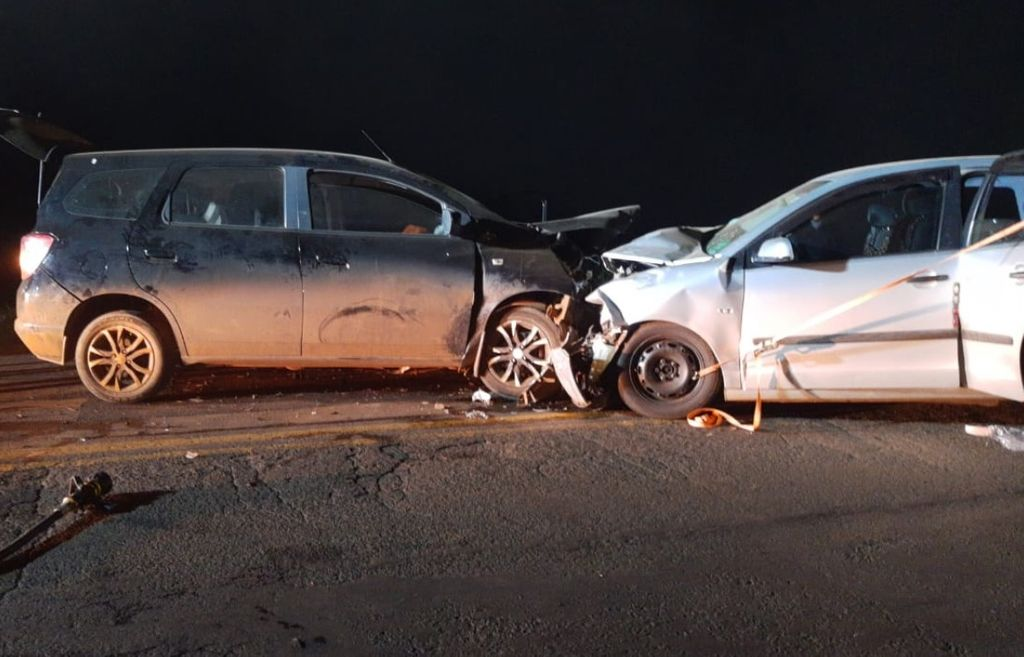

In [ ]:
# Criando um df com a quantidade de mortos por tipo de acidente
df_mortos_acidente = df.groupby('tipo_de_acidente')['mortos'].sum().reset_index()
#Ordenando de forma decrescente
df_mortos_acidente = df_mortos_acidente.sort_values('mortos', ascending=False).reset_index()
#Mostrando so 7 primeiros
df_mortos_acidente.head(7)

#### ***A morte por colisão frontal representa 17.75 % de todas as mortes nas rodovias***

In [ ]:
porcentagem_colisao_frontal = round(df_mortos_acidente.iloc[0,2]/df_mortos_acidente.iloc[0:,2].sum() * 100, 2)

porcentagem_colisao_frontal

17.75

#### ***Além de ser a causa mais comum de fatalidade dos acidentes com vitimas fatais, Cerca de 27.79% das Colisões frontais resultam em morte***

Além disso segundo a PRF, a maior causa desse tipo de acidente é a ultrapassagem malfeita
fonte: [G1.globo.com](https://g1.globo.com/Noticias/Brasil/0,,MUL601011-5598,00-COLISAO+FRONTAL+E+PRINCIPAL+CAUSA+DE+MORTES+NAS+ESTRADAS+DIZ+PRF.html)

In [ ]:
perc_front_fatal = round(rank_acidente_fatal['Colisão Frontal']/rank_acidente_vitima['Colisão Frontal'] * 100, 2)

perc_front_fatal

27.79

In [ ]:
#Análsies estatísticas
media = rank_acidente_fatal.mean()
mediana = rank_acidente_fatal.median()
desvio_padrao = rank_acidente_fatal.std()
total = rank_acidente_fatal.sum()

print('Total:', total)
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)

Total: 16841
Média: 133.65873015873015
Mediana: 21.0
Desvio Padrão: 334.41225247166795


In [ ]:
#Plotagem dos principais tipos de acidentes fatais
fig = px.bar(rank_acidente_fatal.head(7))

fig.update_xaxes(title_text='Tipo de acidente')  # Mudando label de x
fig.update_yaxes(title_text='Quantidade de Acidentes')  # Mudando label de y

fig.show()

> Dentre essas categorias, a Colisão Frontal é a que registra o maior número de ocorrências, totalizando 2,474 casos. A Colisão Traseira vem em segundo lugar, com 1,909 casos, seguida por Capotamento, com 1,009 casos.
>

### 2.2 Análise dos trechos

In [ ]:
#Analisando os principais trechos de acidentes
rank_trechos = df['trecho'].value_counts()
rank_trechos.head(7)

BR-101/SC    95340
BR-381/MG    84425
BR-116/SP    83495
BR-116/PR    78403
BR-116/RJ    71133
BR-101/RJ    50413
BR-040/RJ    43219
Name: trecho, dtype: int64

#### Segundo a PRF a BR-101/SC é a rodovia com mais acidentes no brasil, e os dados acima ajudam a provar isso.

fonte: [G1](https://g1.globo.com/sc/santa-catarina/noticia/2022/05/19/br-101-em-sc-e-rodovia-federal-com-maior-numero-de-acidentes-do-pais-aponta-prf.ghtml)

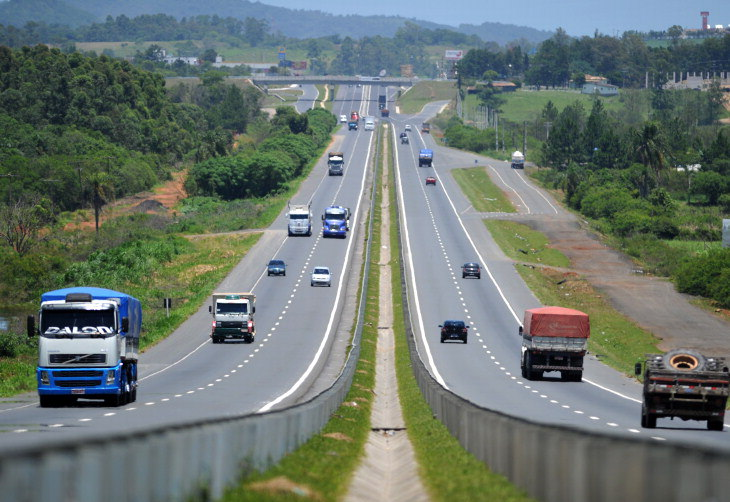

In [ ]:
#Análsies estatísticas
media_trechos = rank_trechos.mean()
mediana_trechos = rank_trechos.median()
desvio_padrao_trechos = rank_trechos.std()
total_trechos = rank_trechos.sum()

print('Total:', total_trechos)
print("Média:", media_trechos)
print("Mediana:", mediana_trechos)
print("Desvio Padrão:", desvio_padrao_trechos)

Total: 863314
Média: 6851.6984126984125
Mediana: 103.0
Desvio Padrão: 17775.60064775076


#### 2.2.1 BR-101/SC

In [ ]:
#Verificando locais de acidentes do trecho
lugares_sc = df['lugar_acidente'][df['trecho'] == 'BR-101/SC'].value_counts()
display(lugares_sc)

#Analisando a porcentagem de acidentes dividido entre os locais
px.pie(lugares_sc, values=lugares_sc.values, names=lugares_sc.index)

Autopista Litoral Sul    90943
Via Costeira              4397
Name: lugar_acidente, dtype: int64

In [ ]:
# Além de ser a rodovia com mais acidentes em SC é a rodovia com mais acidentes em todo o Brasil.
rank_lugar_acidente = df['lugar_acidente'].value_counts()

rank_lugar_acidente.head()

Autopista Litoral Sul          123018
Novadutra                      114936
Autopista Fernão Dias          108496
Autopista Regis Bittencourt     73109
Concer                          48022
Name: lugar_acidente, dtype: int64

In [ ]:
#Trechos com mais acidentes fatais
rank_rodovia_fatais = df['trecho'][(df['mortos'] > 0)].value_counts()
rank_rodovia_fatais.head(7)

BR-116/PR    1484
BR-116/SP    1358
BR-116/RJ    1302
BR-101/RJ    1284
BR-381/MG    1239
BR-101/SC    1093
BR-116/BA     985
Name: trecho, dtype: int64

In [ ]:
#Rodovia com mais acidentes fatais
rank_rodovia_fatais = df['lugar_acidente'][(df['mortos'] > 0)].value_counts()
rank_rodovia_fatais.head(7)

Novadutra                      1956
Autopista Fernão Dias          1685
Via Bahia                      1549
Autopista Litoral Sul          1518
Autopista Regis Bittencourt    1248
Autopista Fluminense           1239
Concebra                       1063
Name: lugar_acidente, dtype: int64

<Axes: title={'center': 'Locais com mais acidentes fatais'}>

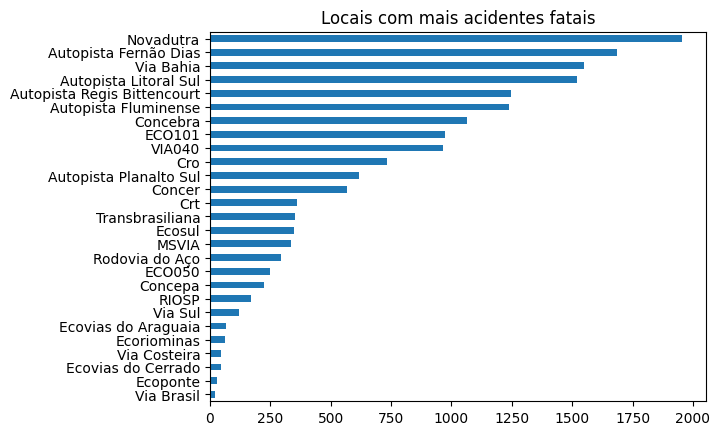

In [ ]:
#Demonstrando isso em gráfico
df_fatal = df[df['mortos'] > 0]

df_fatal['lugar_acidente'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Locais com mais acidentes fatais')

In [ ]:
# Confirmando a quantidade de mortos ao invés de apenas os acidentes com mortos
df_local = df.groupby('lugar_acidente')['mortos'].sum().reset_index()
df_local = df_local.sort_values('mortos', ascending=False)

df_local.head(7)

### Conclusão da análise

Realizamos uma exploração inicial dos dados de acidentes em rodovias federais brasileiras entre 2010 e 2022. Foram obtidos insights sobre os tipos de acidentes mais frequentes e fatais, os trechos rodoviários críticos, a evolução temporal dos acidentes e os veículos envolvidos.

A análise mostrou que a colisão traseira é o tipo mais comum, porém as colisões frontais, apesar de menos frequentes, têm alta letalidade. O trecho da BR-101 em Santa Catarina se destaca com a maior quantidade de acidentes, especialmente no km 152. Observou-se um aumento dos acidentes entre 2010 e 2016, estabilizando depois.

O estudo possui limitações como a falta de outros dados relevantes, como condições meteorológicas, qualidade das rodovias e informações mais detalhadas sobre condutores e veículos.

Mesmo assim, os insights são úteis para orientar ações de melhoria da segurança viária, focando na fiscalização de ultrapassagens e no tratamento de trechos críticos.
Além disso, quanto ao acidente mais comum, colisão traseira, há algumas atitudes indispensáveis para evitá-las:
- Não manuseie aparelhos de telefone celular;
- Tenha atenção à sinalização;
- Reduza a velocidade em trechos em obras;
- Trafegue dentro da velocidade determinada;
- Revise os freios do seu veículo rotineiramente.